A) Set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.    

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
diabetes_db= pd.read_csv("/content/diabetes.csv")

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = diabetes_db.sample(n=25)

# Calculate mean and highest glucose values for sample and population
mean_glucose_sample_value = round(sample['Glucose'].mean(),2)
print("Mean of Glucose Values for Sample: ", mean_glucose_sample_value)
highest_glucose_sample_value = sample['Glucose'].max()
print("Highest of Glucose Values for Sample: ", highest_glucose_sample_value)
mean_glucose_population_value = round(diab_dt['Glucose'].mean(),2)
print("Mean of Glucose Values for Population: ", mean_glucose_population_value)
highest_glucose_population_value = diab_dt['Glucose'].max()
print("Highest of Glucose Values for Population: ", highest_glucose_population_value)


Mean of Glucose Values for Sample:  116.64
Highest of Glucose Values for Sample:  183
Mean of Glucose Values for Population:  120.89
Highest of Glucose Values for Population:  199


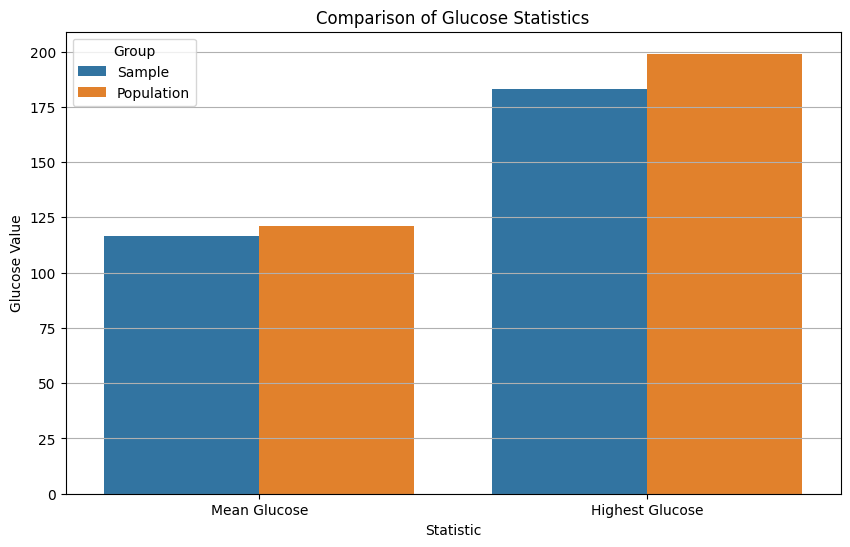

In [5]:
# Compare the statistics using charts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the variables are already defined:
# sample_mean_glucose, population_mean_glucose, sample_highest_glucose, population_highest_glucose

# Create a DataFrame for plotting
data = {
    'Statistic': ['Mean Glucose', 'Highest Glucose', 'Mean Glucose', 'Highest Glucose'],
    'Group': ['Sample', 'Sample', 'Population', 'Population'],
    'Glucose Value': [mean_glucose_sample_value, highest_glucose_sample_value, mean_glucose_population_value, highest_glucose_population_value]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Statistic', y='Glucose Value', hue='Group', data=df)
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Value')
plt.grid(axis='y')
plt.show()


B) Find the 98th percentile of BMI of your sample and the population and compare the results using charts

In [6]:
# Find the 98th percentile of BMI for sample and population
sample_bmi_98th_percentile = np.percentile(sample['BMI'], 98)
print("Sample 98th percentile BMI:", round(sample_bmi_98th_percentile, 2))
population_bmi_98th_percentile = np.percentile(diab_dt['BMI'], 98)
print("Population 98th percentile BMI:", round(population_bmi_98th_percentile, 2))

Sample 98th percentile BMI: 40.25
Population 98th percentile BMI: 47.53


<ipython-input-7-d33f15c2fb98>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='98th Percentile BMI', data=df, ax=ax1, alpha=0.6, palette=['blue', 'green'])


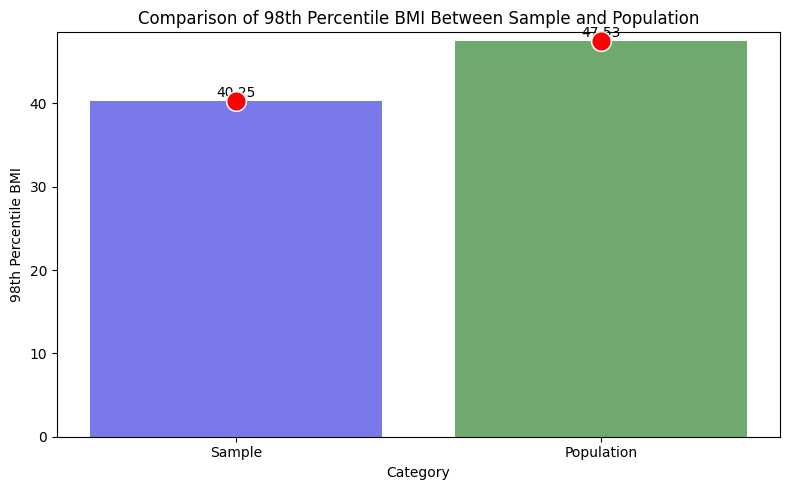

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the variables bmi_98th_percentile_sample and bmi_98th_percentile_population are already defined

# Data preparation
data = {
    'Category': ['Sample', 'Population'],
    '98th Percentile BMI': [sample_bmi_98th_percentile, population_bmi_98th_percentile]
}
df = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for each category
sns.barplot(x='Category', y='98th Percentile BMI', data=df, ax=ax1, alpha=0.6, palette=['blue', 'green'])

# Scatter plot on top of the bars to highlight the exact values
sns.scatterplot(data=df, x='Category', y='98th Percentile BMI', s=200, color='red', ax=ax1, zorder=5)

# Annotating values
for index, row in df.iterrows():
    ax1.text(x=index, y=row['98th Percentile BMI'] + 0.1, s=f"{row['98th Percentile BMI']:.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

ax1.set_title('Comparison of 98th Percentile BMI Between Sample and Population')
ax1.set_ylabel('98th Percentile BMI')
ax1.set_ylim(0, max(df['98th Percentile BMI']) + 1)  # Adjusting y-axis limits for better visualization

plt.tight_layout()
plt.show()


(C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable.

In [8]:
import numpy as np

def calculate_bootstrap_stats(data, num_samples=500, sample_size=150):
    blood_pressure_values = data['BloodPressure'].to_numpy()

    indices = np.random.randint(0, len(blood_pressure_values), (num_samples, sample_size))
    bootstrap_samples = blood_pressure_values[indices]

    means = np.mean(bootstrap_samples, axis=1)
    stds = np.std(bootstrap_samples, axis=1)
    medians = np.median(bootstrap_samples, axis=1)

    return means, stds, medians

# Assuming diab_dt is your DataFrame and it has been imported
bootstrap_means, bootstrap_stds, bootstrap_medians = calculate_bootstrap_stats(diab_dt)

pop_mean_bp = round(diabetes_db['BloodPressure'].mean(), 2)
pop_std_bp = round(diabetes_db['BloodPressure'].std(), 2)
pop_median_bp = round(np.percentile(diabetes_db['BloodPressure'], 50), 2)

print(f"Population Mean BP: {pop_mean_bp}")
print(f"Population Standard BP: {pop_std_bp}")
print(f"Population Median BP: {pop_median_bp}")


Population Mean BP: 69.11
Population Standard BP: 19.36
Population Median BP: 72.0


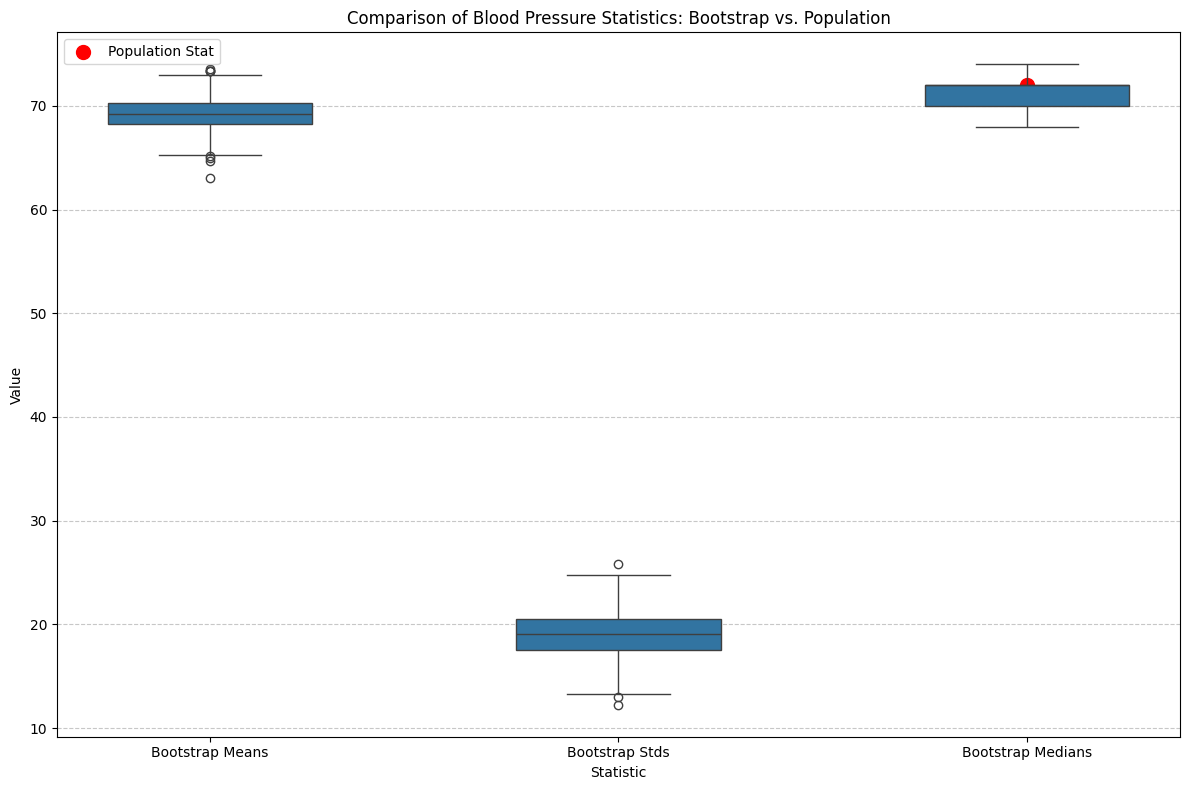

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the bootstrap statistics and population statistics are already calculated and stored in variables:
# bootstrap_means, bootstrap_stds, bootstrap_medians, pop_mean_bp, pop_std_bp, pop_median_bp

# Preparing data for plotting
bootstrap_data = {
    'Bootstrap Means': bootstrap_means,
    'Bootstrap Stds': bootstrap_stds,
    'Bootstrap Medians': bootstrap_medians
}
bootstrap_df = pd.DataFrame(bootstrap_data)
bootstrap_df_melted = pd.melt(bootstrap_df, var_name='Statistic', value_name='Value')

population_values = [pop_mean_bp, pop_std_bp, pop_median_bp]
population_labels = ['Bootstrap Means', 'Bootstrap Stds', 'Bootstrap Medians']

# Plotting
plt.figure(figsize=(12, 8))

# Box plot for bootstrap statistics
sns.boxplot(x='Statistic', y='Value', data=bootstrap_df_melted, width=0.5)

# Scatter plot for population statistics
for i, label in enumerate(population_labels):
    plt.scatter(x=i, y=population_values[i], color='red', s=100, label='Population Stat' if i == 0 else "")

plt.title('Comparison of Blood Pressure Statistics: Bootstrap vs. Population')
plt.ylabel('Value')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Observations:**

1.Glucose Statistics:

The bar chart compares the mean and highest glucose values between a sample and a population, illustrating that the highest glucose values are notably greater than the mean glucose values for both groups. It also shows that the sample group has a slightly higher mean glucose value but a slightly lower highest glucose value compared to the population group.


2.BMI statistics:

The bar chart presents a comparison of the 98th percentile BMI between a sample group and a population, where both have very similar values just above 40. The chart highlights these values with red dots, which indicate that the 98th percentile BMI is virtually identical for the sample and the population.


3.Blood Pressure(BP) Statistics:

The graph displays box plots for the distribution of bootstrap means, standard deviations (stds), and medians for blood pressure, along with red points indicating the corresponding population statistics. It shows that the population mean and median blood pressure values are within the interquartile range of the bootstrap samples, while the population standard deviation is slightly higher than the range of the bootstrap samples.










